In [0]:
pip install gdown

In [0]:
# Importing required libraries
import sys
import pandas as pd
import gdown
import os

In [0]:
# Downloading required datasets from goodreads
url1 = 'https://drive.google.com/uc?id=1CCj-cQw_mJLMdvF_YYfQ7ibKA-dC_GA2'
url2 = 'https://drive.google.com/uc?id=1V4MLeoEiPQdocCbUHjR_7L9ZmxTufPFe'
url3='https://drive.google.com/uc?id=1ICk5x0HXvXDp5Zt54CKPh5qz1HyUIn9m'
gdown.download(url1, output=None, quiet=False)
gdown.download(url2, output=None, quiet=False)
gdown.download(url3, output=None, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1CCj-cQw_mJLMdvF_YYfQ7ibKA-dC_GA2
To: /content/goodreads_interactions_comics_graphic.json.gz
387MB [00:08, 48.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V4MLeoEiPQdocCbUHjR_7L9ZmxTufPFe
To: /content/goodreads_reviews_comics_graphic.json.gz
147MB [00:01, 87.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ICk5x0HXvXDp5Zt54CKPh5qz1HyUIn9m
To: /content/goodreads_books_comics_graphic.json.gz
68.4MB [00:00, 74.2MB/s]


'goodreads_books_comics_graphic.json.gz'

In [0]:
# Converting json to string to pandas object
# Reading the goodreads book dataset
fn = filename
books = pd.read_json(fn, lines=True, compression='gzip')
books.tail()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
89406,,22,[],US,,"[{'count': '114', 'name': 'to-read'}, {'count'...",B01GENHTK0,true,3.97,B01GENHTK0,[],Jump on board the TARDIS with FOUR all-new sho...,,https://www.goodreads.com/book/show/30848889-d...,"[{'author_id': '61373', 'role': ''}, {'author_...",,,,,,,,https://www.goodreads.com/book/show/30848889-d...,https://s.gr-assets.com/assets/nophoto/book/11...,30848889,338,51454503,Doctor Who: Free Comic Book Day 2016,Doctor Who: Free Comic Book Day 2016
89407,,2,[669800],US,,"[{'count': '620', 'name': 'to-read'}, {'count'...",B01HDRTT5Y,true,3.86,B01HDRTT5Y,"[23862438, 23546829, 2480741, 16070295, 234922...","A day in the life of the king of the jungle, t...",,https://www.goodreads.com/book/show/33553114-love,"[{'author_id': '1197767', 'role': ''}, {'autho...",,,,,,,,https://www.goodreads.com/book/show/33553114-love,https://s.gr-assets.com/assets/nophoto/book/11...,33553114,4,40074057,Love: The Tiger,Love: The Tiger
89408,,5,[638272],US,spa,"[{'count': '52', 'name': 'to-read'}, {'count':...",,false,3.87,,[],EL GRAN CLASICO DEL GENERO FANTASTICO EN UN VO...,Hardcover,https://www.goodreads.com/book/show/20653416-l...,"[{'author_id': '665253', 'role': 'writer'}, {'...",Norma Editorial,224,,9788467912937,11,Integral Edition,2013,https://www.goodreads.com/book/show/20653416-l...,https://images.gr-assets.com/books/1391037254m...,20653416,28,19161997,La búsqueda del pájaro del tiempo,La búsqueda del pájaro del tiempo
89409,,2,[],US,eng,"[{'count': '1', 'name': '3-2017-ha-pages-read-...",,true,3.00,,[],Prepare yourself for Dejah Thoris as you've ne...,Kindle Edition,https://www.goodreads.com/book/show/28928706-d...,"[{'author_id': '5740317', 'role': 'Writer'}, {...",Dynamite Entertainment,30,3,,2,,2016,https://www.goodreads.com/book/show/28928706-d...,https://images.gr-assets.com/books/1454539757m...,28928706,10,49145631,Dejah Thoris #1,Dejah Thoris #1
89410,,4,[],US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",B00OEK0HQE,true,4.24,B00OEK0HQE,[],"In the city that never sleeps, spirits are equ...",Kindle Edition,https://www.goodreads.com/book/show/23363286-d...,"[{'author_id': '7741497', 'role': ''}, {'autho...",Chromatic Press,219,29,,9,,2014,https://www.goodreads.com/book/show/23363286-d...,https://images.gr-assets.com/books/1413258573m...,23363286,15,42919549,Dead Endings,Dead Endings


In [0]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89411 entries, 0 to 89410
Data columns (total 29 columns):
isbn                    89411 non-null object
text_reviews_count      89411 non-null int64
series                  89411 non-null object
country_code            89411 non-null object
language_code           89411 non-null object
popular_shelves         89411 non-null object
asin                    89411 non-null object
is_ebook                89411 non-null object
average_rating          89411 non-null float64
kindle_asin             89411 non-null object
similar_books           89411 non-null object
description             89411 non-null object
format                  89411 non-null object
link                    89411 non-null object
authors                 89411 non-null object
publisher               89411 non-null object
num_pages               89411 non-null object
publication_day         89411 non-null object
isbn13                  89411 non-null object
publication_month

In [0]:
books.describe()

,text_reviews_count,average_rating,book_id,ratings_count,work_id
count,89411.000000,89411.000000,8.941100e+04,89411.000000,8.941100e+04
mean,19.531948,3.908330,1.601999e+07,382.483766,2.202957e+07
std,118.265875,0.426598,1.095541e+07,3199.391132,1.920687e+07
min,0.000000,0.000000,3.740000e+02,0.000000,7.970000e+02
25%,2.000000,3.660000,6.420996e+06,13.000000,2.590665e+06
50%,4.000000,3.970000,1.623135e+07,39.000000,1.812011e+07
75%,11.000000,4.220000,2.544774e+07,133.000000,4.290416e+07
max,10057.000000,5.000000,3.650849e+07,406669.000000,5.837457e+07


In [0]:
# Display duplicated rows
display(books[books.duplicated(['book_id'], keep=False)])

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series


In [0]:
books_20 = books.head(20)

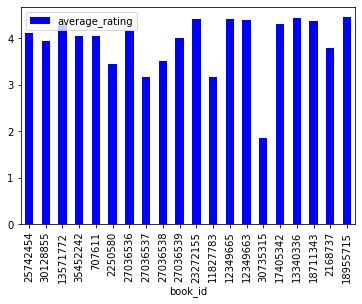

In [0]:
# Visualization
# Graph: Average Ratings per book 
import numpy as np
import matplotlib.pyplot as plt
books_20.plot(kind='bar',x='book_id',y='average_rating',color='blue')
plt.show()


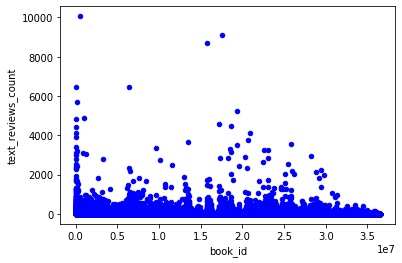

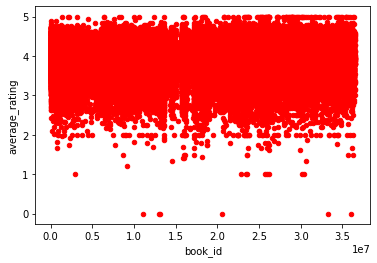

In [0]:
# Scatter plot for number of reviews per book
books.plot(kind='scatter',x='book_id',y='text_reviews_count',color = 'blue')
plt.show()

###### As part of pre-processing, we will drop columns that we do not require . After pre-processing, the book data will have below features
text_reviews_count      
country_code            
language_code           
popular_shelves         
is_ebook                
average_rating   
description            
authors                 
publication_year        
book_id                 
ratings_count           
title                   
title_without_series   





In [0]:
# Reading the goodreads (user-book) interactions dataset
fn1 = filename
interactions = pd.read_json(fn1, lines=True, compression='gzip')
interactions.tail()

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
7347625,bd3ac2e547a4f521927056cbd6bb5c2f,1484167,bbaef6acb7e6e1a165e3b52c1ad56c67,True,5,,Thu Jun 07 08:39:53 -0700 2012,Thu Jun 07 08:39:53 -0700 2012,,
7347626,bd3ac2e547a4f521927056cbd6bb5c2f,122451,cdd31f160c2db01232b9998600940d0c,True,5,,Wed Jun 06 15:17:39 -0700 2012,Wed Jun 06 15:17:39 -0700 2012,,
7347627,6384a10d5611945b26b25c971f348fa4,85574,2047dd9f2fc589340a9ec011fbcff490,True,3,,Mon Nov 05 10:37:35 -0800 2012,Mon Nov 05 10:37:48 -0800 2012,,
7347628,e9aea57d21cdf9d91a65687d59518924,15197,e8df0a577d4fd440b223c54cdf641dc0,True,5,,Mon Jun 04 15:45:50 -0700 2012,Mon Jun 04 15:45:50 -0700 2012,,
7347629,762121298ddd3820c9477c6f03f145ab,6493321,98c8116e2fc021e6c5a3cbb8787a993d,True,4,,Sat Jun 09 11:53:18 -0700 2012,Sat Jun 09 11:53:18 -0700 2012,,


In [0]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347630 entries, 0 to 7347629
Data columns (total 10 columns):
user_id                   object
book_id                   int64
review_id                 object
is_read                   bool
rating                    int64
review_text_incomplete    object
date_added                object
date_updated              object
read_at                   object
started_at                object
dtypes: bool(1), int64(2), object(7)
memory usage: 511.5+ MB


In [0]:
interactions.review_id.nunique()

7347630

In [0]:
display(interactions[interactions.duplicated(['user_id', 'book_id'], keep=False)])

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at


In [0]:
# Preprocessing for visualization
shelve_user = interactions['user_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_user = interactions['user_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_user = interactions['user_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
#review_user = df['user_id'].loc[df['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

shelve_book = interactions['book_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_book = interactions['book_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_book = interactions['book_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values

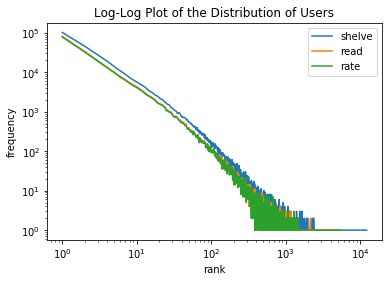

In [0]:
# Log-log plot of the distribution of users
import matplotlib.pyplot as plt
plt.loglog(shelve_user[:,0], shelve_user[:,1], label='shelve')
plt.loglog(read_user[:,0], read_user[:,1], label='read')
plt.loglog(rate_user[:,0], rate_user[:,1], label='rate')
#plt.loglog(review_user[:,0], review_user[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Users')
plt.legend(loc='upper right')

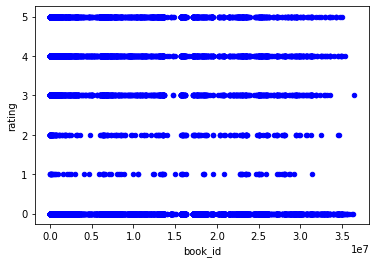

In [0]:
# Scatter plot for ratings of books
interactions_10000 = interactions.head(10000)
interactions_10000.plot(kind='scatter',x='book_id',y='rating',color = 'blue')
plt.show()

In [0]:
# Reading the goodreads reviews data into a pandas object
fn2 = '/content/drive/Shared drives/Project_256/goodreads_reviews_comics_graphic.json.gz'
reviews = pd.read_json(fn2, lines=True, compression='gzip')
reviews.tail()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
542333,c9174473efac302c71adaa1ad2a46091,20176586,8e069a687dbecae9ffe7f5fa8772ac08,3,Bumping this up to a three star rating primari...,Tue Jan 26 20:42:40 -0800 2016,Tue Jan 26 20:46:31 -0800 2016,Wed Jan 27 20:46:31 -0800 2016,Tue Jan 26 00:00:00 -0800 2016,0,0
542334,64946797934367a178abe75e3febce66,11465282,77c383db515b63f84ad0f5de0cb5991d,3,The story didn't pull me in although I'm aware...,Wed Mar 18 06:23:25 -0700 2015,Sun Mar 29 12:54:35 -0700 2015,Sun Mar 29 12:54:35 -0700 2015,Wed Mar 18 00:00:00 -0700 2015,0,0
542335,bd575ed739592a8c20c346e5daa5ac76,31094296,9e059a74a7107fb57f5b45ded1abadb6,5,Stunning follow up. Once again it's not the ar...,Mon Oct 02 07:42:53 -0700 2017,Mon Oct 02 07:44:18 -0700 2017,,,0,0
542336,bd575ed739592a8c20c346e5daa5ac76,27404461,de2a13cd890ead821d846398239d5f1f,5,I grew up with the Terran Trade Authority book...,Sun Dec 06 12:34:17 -0800 2015,Mon Oct 02 07:42:28 -0700 2017,Sun Dec 06 12:39:44 -0800 2015,Wed Dec 02 00:00:00 -0800 2015,0,0
542337,bd575ed739592a8c20c346e5daa5ac76,138398,36a3f1c2fc2cfb96e70773106e158489,4,"For me, this came after playing the Telltale g...",Wed Apr 03 10:10:41 -0700 2013,Wed Apr 03 10:15:04 -0700 2013,,,0,0


In [0]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542338 entries, 0 to 542337
Data columns (total 11 columns):
user_id         542338 non-null object
book_id         542338 non-null int64
review_id       542338 non-null object
rating          542338 non-null int64
review_text     542338 non-null object
date_added      542338 non-null object
date_updated    542338 non-null object
read_at         542338 non-null object
started_at      542338 non-null object
n_votes         542338 non-null int64
n_comments      542338 non-null int64
dtypes: int64(4), object(7)
memory usage: 45.5+ MB


In [0]:
# Selecting the required columns from the books dataset
books_filtered=books[['text_reviews_count','country_code','language_code','popular_shelves','is_ebook','average_rating','description','authors','publication_year','book_id','ratings_count','title','title_without_series']]

In [0]:
books_filtered.head()

,text_reviews_count,country_code,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,title,title_without_series
0,1,US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",true,4.12,Lillian Ann Cross is forced to live the worst ...,"[{'author_id': '8551671', 'role': ''}]",,25742454,1,The Switchblade Mamma,The Switchblade Mamma
1,2,US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,"Florence Dupre Latour raconte comment, de son ...","[{'author_id': '3274315', 'role': ''}]",2016,30128855,16,Cruelle,Cruelle
2,5,US,eng,"[{'count': '493', 'name': 'to-read'}, {'count'...",false,4.28,The questions plaguing Captain America's dream...,"[{'author_id': '37450', 'role': ''}]",2012,13571772,51,Captain America: Winter Soldier (The Ultimate ...,Captain America: Winter Soldier (The Ultimate ...
3,1,US,eng,"[{'count': '222', 'name': 'to-read'}, {'count'...",true,4.05,The fight for Jason Delgado's life and soul be...,"[{'author_id': '16209952', 'role': ''}, {'auth...",,35452242,6,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4/3: My Life in Combat from Mari...
4,6,US,en-US,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.06,These are the stories that catapulted Superman...,"[{'author_id': '81563', 'role': ''}, {'author_...",1997,707611,51,"Superman Archives, Vol. 2","Superman Archives, Vol. 2"


In [0]:
# Selecting required columns from the interactions dataset
interactions_filtered = interactions[['user_id','book_id','review_id','is_read','rating','date_added','date_updated','read_at','started_at']]

In [0]:
interactions_filtered.head()

,user_id,book_id,review_id,is_read,rating,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,836610,6b4db26aafeaf0da77c7de6214331e1e,False,0,Mon Aug 21 12:11:00 -0700 2017,Mon Aug 21 12:11:00 -0700 2017,,
1,8842281e1d1347389f2ab93d60773d4d,7648967,99b27059f711c37de8f90ee8e4dc0d1b,False,0,Fri Feb 24 08:59:44 -0800 2017,Fri Feb 24 08:59:44 -0800 2017,,
2,8842281e1d1347389f2ab93d60773d4d,15704307,cb944d94854df5afd22210bb0aa0c903,False,0,Wed May 20 21:28:56 -0700 2015,Wed May 20 21:28:57 -0700 2015,,
3,8842281e1d1347389f2ab93d60773d4d,6902644,2711bac2a8cc600dae1590a6ca0edb34,False,0,Sun Jun 01 17:25:23 -0700 2014,Sun Jun 01 17:25:23 -0700 2014,,
4,8842281e1d1347389f2ab93d60773d4d,9844623,b72979076d1cded25dded922195e5b1c,False,0,Sun Sep 02 08:45:08 -0700 2012,Sun Sep 02 08:45:08 -0700 2012,,


In [0]:
# Selecting required columns from the reviews dataset
reviews_filtered = reviews[['review_id','review_text','n_votes','n_comments']]

In [0]:
reviews_filtered.head()

,review_id,review_text,n_votes,n_comments
0,66b2ba840f9bd36d6d27f46136fe4772,Sherlock Holmes and the Vampires of London \n ...,0,0
1,72f1229aba5a88f9e72f0dcdc007dd22,"I've never really liked Spider-Man. I am, howe...",0,0
2,a75309355f8662caaa5e2c92ab693d3f,"A very quick introduction, this is coming out ...",0,0
3,c3cc5a3e1d6b6c9cf1c044f306c8e752,I've been waiting so long for this. I first st...,1,0
4,cc444be37ab0a42bfb4dd818cb5edd10,The only thing more entertaining than this boo...,0,0


In [0]:
len(reviews_filtered)

542338

In [0]:
len(interactions_filtered)

7347630

In [0]:
# Merging the books and interactions dataset based on book_id
books_interactions_merged_data = pd.merge(books_filtered, interactions_filtered, on='book_id')

In [0]:
len(books_interactions_merged_data)

7347630

In [0]:
# Merging the books-interactions merged data with the reviews dataset based on review_id
data_merged = pd.merge(books_interactions_merged_data, reviews_filtered, on='review_id', how='left')

In [0]:
data_merged

,text_reviews_count,country_code,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,title,title_without_series,user_id,review_id,is_read,rating,date_added,date_updated,read_at,started_at,review_text,n_votes,n_comments
0,1,US,,"[{'count': '228', 'name': 'to-read'}, {'count'...",true,4.12,Lillian Ann Cross is forced to live the worst ...,"[{'author_id': '8551671', 'role': ''}]",,25742454,1,The Switchblade Mamma,The Switchblade Mamma,f1830550c10246b9924d03fbb7858a3b,cadab2ad2d162553b3b6b2a5884ec0ea,True,5,Wed Jun 15 16:38:58 -0700 2016,Wed Jun 15 16:38:59 -0700 2016,Wed Jun 15 16:38:59 -0700 2016,,Raw and amazing \n This book is unlike any oth...,0.0,0.0
1,2,US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,"Florence Dupre Latour raconte comment, de son ...","[{'author_id': '3274315', 'role': ''}]",2016,30128855,16,Cruelle,Cruelle,12c0f4c16b6cad9f595fc99f3dcb49d4,60158dd333055f54053506e590cc1291,True,4,Mon May 09 05:03:09 -0700 2016,Tue May 10 07:07:51 -0700 2016,Mon May 09 00:00:00 -0700 2016,,NaN,NaN,NaN
2,2,US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,"Florence Dupre Latour raconte comment, de son ...","[{'author_id': '3274315', 'role': ''}]",2016,30128855,16,Cruelle,Cruelle,bdd5da2d7c778880e20573efd4df888a,a4b605858b28feff2cb14018839950d1,True,5,Sat Jan 21 07:18:46 -0800 2017,Sun Feb 05 06:35:09 -0800 2017,Sun Feb 05 06:35:09 -0800 2017,Sat Jan 21 00:00:00 -0800 2017,NaN,NaN,NaN
3,2,US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,"Florence Dupre Latour raconte comment, de son ...","[{'author_id': '3274315', 'role': ''}]",2016,30128855,16,Cruelle,Cruelle,15b0c6dbe18c5e493b39aaa30cb6d2b8,111f1d4941d77877558c4a4ffff87239,False,0,Mon Apr 24 08:28:14 -0700 2017,Mon Apr 24 08:28:20 -0700 2017,,,NaN,NaN,NaN
4,2,US,fre,"[{'count': '2', 'name': 'bd'}, {'count': '2', ...",false,3.94,"Florence Dupre Latour raconte comment, de son ...","[{'author_id': '3274315', 'role': ''}]",2016,30128855,16,Cruelle,Cruelle,dc9f898ef44e9d38d8eb92a7bde1341d,831e2005e78a56b1f90b26877eeea1f3,True,2,Sun Aug 28 16:15:38 -0700 2016,Thu Sep 08 16:51:22 -0700 2016,Thu Sep 08 16:51:22 -0700 2016,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347625,4,US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,"In the city that never sleeps, spirits are equ...","[{'author_id': '7741497', 'role': ''}, {'autho...",2014,23363286,15,Dead Endings,Dead Endings,40cad038063319b661615c26cb2b3c18,351e74e7b4ff8f5633816fdcde6a6e9b,False,0,Fri Sep 01 08:13:26 -0700 2017,Fri Sep 01 08:13:26 -0700 2017,,,NaN,NaN,NaN
7347626,4,US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,"In the city that never sleeps, spirits are equ...","[{'author_id': '7741497', 'role': ''}, {'autho...",2014,23363286,15,Dead Endings,Dead Endings,8bcf48afa72aba125b53749c2e7c9ad4,942e7e8b5940a38ba043e58f4b2cf5e5,False,0,Fri Oct 24 20:50:34 -0700 2014,Fri Oct 24 20:50:34 -0700 2014,,,NaN,NaN,NaN
7347627,4,US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,"In the city that never sleeps, spirits are equ...","[{'author_id': '7741497', 'role': ''}, {'autho...",2014,23363286,15,Dead Endings,Dead Endings,699b0a72e1e07abc5a6d2736b109928f,68c2c4206e6e51ba949bd6565ff8b236,False,0,Tue Nov 11 19:52:22 -0800 2014,Tue Nov 11 19:52:23 -0800 2014,,,NaN,NaN,NaN
7347628,4,US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,"In the city that never sleeps, spirits are equ...","[{'author_id': '7741497', 'role': ''}, {'autho...",2014,23363286,15,Dead Endings,Dead Endings,262b53abd0d2da2e8d02c362fdeaf4f5,8832a503b572ddf880416150c3e7cdfe,False,0,Wed Apr 01 07:43:41 -0700 2015,Wed Apr 01 07:43:43 -0700 2015,,,NaN,NaN,NaN


In [0]:
len(data_merged)

7347630

In [0]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7347630 entries, 0 to 7347629
Data columns (total 24 columns):
text_reviews_count      int64
country_code            object
language_code           object
popular_shelves         object
is_ebook                object
average_rating          float64
description             object
authors                 object
publication_year        object
book_id                 int64
ratings_count           int64
title                   object
title_without_series    object
user_id                 object
review_id               object
is_read                 bool
rating                  int64
date_added              object
date_updated            object
read_at                 object
started_at              object
review_text             object
n_votes                 float64
n_comments              float64
dtypes: bool(1), float64(3), int64(4), object(16)
memory usage: 1.3+ GB


In [0]:
data_merged.isnull().sum()

text_reviews_count            0
country_code                  0
language_code                 0
popular_shelves               0
is_ebook                      0
average_rating                0
description                   0
authors                       0
publication_year              0
book_id                       0
ratings_count                 0
title                         0
title_without_series          0
user_id                       0
review_id                     0
is_read                       0
rating                        0
date_added                    0
date_updated                  0
read_at                       0
started_at                    0
review_text             6805292
n_votes                 6805292
n_comments              6805292
dtype: int64

In [0]:
#data_merged['authors'][0][0]

In [0]:
authors=data_merged['authors']

In [0]:
print(authors.head(100))

0                [{'author_id': '8551671', 'role': ''}]
1                [{'author_id': '3274315', 'role': ''}]
2                [{'author_id': '3274315', 'role': ''}]
3                [{'author_id': '3274315', 'role': ''}]
4                [{'author_id': '3274315', 'role': ''}]
                            ...                        
95    [{'author_id': '14155472', 'role': ''}, {'auth...
96    [{'author_id': '14155472', 'role': ''}, {'auth...
97    [{'author_id': '14155472', 'role': ''}, {'auth...
98    [{'author_id': '14155472', 'role': ''}, {'auth...
99    [{'author_id': '14155472', 'role': ''}, {'auth...
Name: authors, Length: 100, dtype: object


In [0]:
authors.tail()

7347625    [{'author_id': '7741497', 'role': ''}, {'autho...
7347626    [{'author_id': '7741497', 'role': ''}, {'autho...
7347627    [{'author_id': '7741497', 'role': ''}, {'autho...
7347628    [{'author_id': '7741497', 'role': ''}, {'autho...
7347629    [{'author_id': '7741497', 'role': ''}, {'autho...
Name: authors, dtype: object

In [0]:
# Extracting author_id from authors column
authors2=[]
for i in authors:
    author=[]
    for j in i:
      author.append(j['author_id'])
    #print(author)
    authors2.append(author)   

In [0]:
#authors2

In [0]:
#authorID = pd.DataFrame(authors2) 

In [0]:
#authorID.head()

In [0]:
data_merged2=data_merged

In [0]:
# Merging the author_id column in the final merged data
data_merged2['authorid'] = authors2
# Final merged data created 

In [0]:
# Creating a correlation map on the final merged data
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [0]:
def plot_correlation_map( df ):
    corr = data_merged_less.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

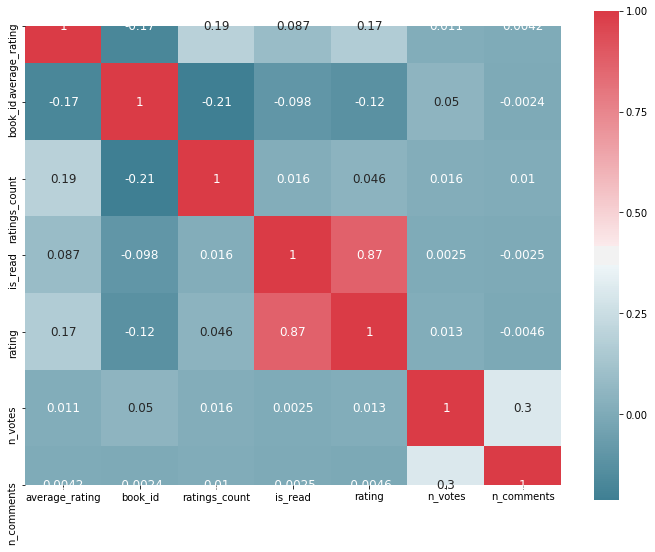

In [0]:
plot_correlation_map(data_merged_less)
plt.savefig('corr_map.png')

In [0]:
len(data_merged2)

7347630

In [0]:
# Writing the pandas object to a csv file
data_merged2.to_csv('/content/drive/Shared drives/Project_256/Complete_Data.gz', compression='gzip')